<a href="https://colab.research.google.com/github/inteligenciafrvm/inteligenciafrvm/blob/master/Clases%20pr%C3%A1cticas/3.%20Intro%20al%20aprendizaje%20supervisado%20(clasificaci%C3%B3n%20I).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al ML: Aprendizaje Supervisado - Clasificación (Parte I)

* Vista general del Aprendizaje Supervisado
* Problemas de Clasificación
* k-Nearest Neighbors
* Entrenamiento y test de un modelo
* Validación cruzada
* Ajuste de Híper-parámetros
* Balance entre Sesgo y Varianza

5to año - Ingeniería en Sistemas de Información

UTN - Facultad Regional Villa María

*"We are drowning in information and starving for knowledge."*

                                        –Rutherford D. Roger


## Introducción al Aprendizaje Supervisado

Objetivo de máxima: predecir salidas $y$ a partir de una matriz de entrada:

    
$X = 
 \begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{n,1} & x_{n,2} & \cdots & x_{n,p} 
 \end{pmatrix}
$




Es una matriz de orden $n \times p$, donde $n$ es la **cantidad de observaciones** (representando cada fila a una observación individual), mientras que $p$ es la **cantidad de predictores**. En otras palabras, $X$ es una matriz de $n$ entradas donde cada una tiene $p$ predictores. 



Salidas:

$y = 
 \begin{pmatrix}
  y_{1} \\
  y_{2} \\
  \vdots  \\
  y_{n}  
 \end{pmatrix}$




$y$ es un vector de orden $n \times 1$ que representa las salidas observadas asociadas a cada fila de entradas. De esta manera, $y_i$ es un escalar de salida observada a partir del vector fila de entrada observada $X_i$, donde

Observación $X_i = 
 \begin{pmatrix}
  x_{i,1} & x_{i,2} & \cdots & x_{i,p}
 \end{pmatrix}$

Ejemplo (reducido a partir de https://archive.ics.uci.edu/ml/datasets/Mushroom):

En base a nuestro (pequeño) conjunto de datos, tenemos que determinar si un hongo es o no venenoso. Contamos con 2 predictores: el predictor 1 es la forma del sombrero del hongo mientras que el predictor 2 es el color del sombrero. Contamos con tres observaciones



$X = 
 \begin{pmatrix}
  \text{convexa} & \text{marrón} \\
  \text{convexa} & \text{blanco} \\
  \text{campana} & \text{blanco} 
 \end{pmatrix}
$


$y = 
 \begin{pmatrix}
  \text{venenoso} \\
  \text{comestible} \\
  \text{comestible}  
 \end{pmatrix}$
 
$y_i \in \{venenoso, comestible\}$
 
Objetivo: 

* Encontrar un modelo que pueda aprender cuándo un hongo es venenoso, para poder **generalizarlo** a hongos no vistos con anterioridad.

* Se busca que nuestras predicciones $\hat{y}$ sean lo más cercanas posible a los valores verdaderos observados $y = f(X) + \epsilon$, donde $f(X)$ es la desconocida **función objetivo** (el "sombrero", $\hat{}$, denota estimación).

Comentario: el criterio utilizado para los nombres es el de mantener los nombres originales (en inglés) en la medida de lo posible. Esto se debe a que no existe amplia bibliografía en español sobre los temas aquí presentados, por lo tanto preferimos no traducir la mayoría de los términos, puesto que entendemos podría dificultar su posterior consulta en la bibliografía. Para aquellos términos que han sido traducidos, se aclara entre paréntesis su correspondiente término en inglés.

Vista general:
    
* Dado $X$, existen variables llamadas características, los cuales expresan aspectos de cada observación que pueden ser medidos o calculados (también llamadas features, inputs, predictors o independent variables).

* Los mismos influyen sobre otras llamadas variables de respuesta $y$ (también se denominan como response, outputs, dependent, target variables).

* En el aprendizaje supervisado, el conjunto que incluye a $X$ e $y$ conforma el **dataset** $D_n = \{(X_1,y_1), (X_2,y_2),..., (X_n,y_n)\}$ compuesto por 
    * $X_i \in \mathbb{R}^p$ 
    * $y_i \in \mathbb{R}$ o bien $y_i \in \{c_1, c_2, ..., c_n\}$ dependiendo de si se trata de un problema de **regresión** o de **clasificación**.

* El aprendizaje es "supervisado" porque el agente que aprende cuenta a priori con ejemplos correctos. Tras **entrenar** con ellos, el agente aprende a generalizar de tal modo de generar buenas predicciones sobre datos no observados.

* A partir de $D$, se distinguen el subconjunto de **datos de entrenamiento**, utilizados para adaptar el modelo y el subconjunto de **datos de test**, empleados para testear la capacidad de generalización del modelo para salidas no utilizadas en el entrenamiento.

![](images/3/supervised_workflow.svg)

Algunos ejemplos:

* Predecir el riesgo de una determinada enfermedad.
* Identificar una persona en una fotografía.
* Predecir si un correo es o no spam.
* Predecir el costo de una casa en base a sus características.

El aprendizaje supervisado se divide en dos categorías: regresión y clasificación.

* En problemas de regresión, **las salidas son variables continuas y ordenadas**. En otras palabras, una predicción $y=14.7$ es mayor que una predicción $y=12.5$ (esto no implica que la primera predicción sea más precisa que la segunda).


* En problemas de clasificación, por su parte, **las salidas son variables nominales discretas y no ordenadas**. Es decir que si las salidas posibles son "rojo" y "naranja", no es posible asumir un orden entre ellas como "rojo" > "naranja".

Se describen a continuación dos librerías principales de python para estos problemas

#### sci-kit learn

* Librería que contiene algoritmos de ML de regresión, clasificación, clustering, etc. así como utilidades como sets de datos de ejemplo.

* Define una interfaz común para todos los algoritmos. Método común a todos: `fit()`, adapta los datos de entrenamiento al modelo elegido. Dependiendo de la naturaleza de cada algoritmo, se definen distintos métodos comunes para cada uno de ellos.

* Los datos en sci-kit learn, en la gran mayoría de los casos, se asumen como un array de dos dimensiones, de forma X=[n_ejemplos, n_características]. Cada ejemplo es un ítem a ser procesado (ej: clasificado), pudiendo ser algo tan simple como una fila de excel a imágenes o videos.

* Por su parte, las características, cuya cantidad se establece a-priori, se usan para describir cada ítem de forma cuantitativa. Normalmente son representadas por valores reales, aunque también puede tratarse de valores booleanos o discretos.

Para el aprendizaje supervisado, scikit-learn provee la siguiente interfaz común de métodos

* `model.fit(X,y)` $\to$ modelo entrenado





* `model.predict(X)` $\to$ predicción $\hat{y}$ de $X$

+ `model.predict_proba(X)` $\to$ probabilidad de cada clase para cada $X_i \in X$

+ `model.score(X, y)` $\to$ tasa de aciertos (clasificación) o $R^2$ (regresión)





+ `model.transform(X)` $\to$ $X'$

### sci-py

sci-py es una colección de librerías y algoritmos importante para machine learning. Normalmente el paquete a utilizar debe importarse por separado según necesidad. Algunos ejemplos:

     cluster                      : Vector Quantization / Kmeans
     fftpack                      : Discrete Fourier Transform algorithms
     integrate                    : Integration routines
     interpolate                  : Interpolation Tools
     io                           : Data input and output
     lib                          : Python wrappers to external libraries
     lib.blas                     : Wrappers to BLAS library
     lib.lapack                   : Wrappers to LAPACK library
     linalg                       : Linear algebra routines
     misc                         : Various utilities that don't have another home.
     ndimage                      : n-dimensional image package
     odr                          : Orthogonal Distance Regression
     optimize                     : Optimization Tools
     signal                       : Signal Processing Tools
     sparse                       : Sparse Matrices
     sparse.linalg                : Sparse Linear Algebra
     sparse.linalg.dsolve         : Linear Solvers
     sparse.linalg.dsolve.umfpack : :Interface to the UMFPACK library:
     sparse.linalg.eigen          : Sparse Eigenvalue Solvers
     sparse.linalg.eigen.arpack   : Eigenvalue solver using iterative methods.
     sparse.linalg.eigen.lobpcg   : Locally Optimal Block Preconditioned
                                      Conjugate Gradient Method (LOBPCG)     
     spatial                      : Spatial data structures and algorithms
     special                      : Airy Functions

     stats                        : Statistical Functions                     

In [1]:
# ejemplo: distribucion normal con media=0 y varianza=1
import numpy as np
from scipy import stats
np.random.seed(13) # semilla aleatoria: muy util para replicar experimentos
dist = stats.norm(0,1)
r = dist.rvs(10) # diez muestras aleatorias
p = dist.pdf(0) # pdf en x=0
c = dist.cdf(0) # cdf en x=0
print(r)
print('pdf =',p)
print('cdf =',c)

[-0.71239066  0.75376638 -0.04450308  0.45181234  1.34510171  0.53233789
  1.3501879   0.86121137  1.47868574 -1.04537713]
pdf = 0.3989422804014327
cdf = 0.5


## Problemas de Regresión

![Problema de regresión](images/3/regression_problem.png)

[Fuente](https://ml.berkeley.edu/blog/posts/crash-course/part-5/)

## Problemas de Clasificación





* En los problemas de clasificación, la respuesta es **discreta** y **nominal**, en el sentido de que la misma es una categoria $c_i \in \{C_1, C_2, ..., C_n\}$, en donde no podemos asumir en ningún caso que $c_i > c_j$.

![Clasificación](images/3/classification_problem.png)

[Fuente](https://ml.berkeley.edu/blog/posts/crash-course/part-5/)

* Al no existir un ordenamiento entre las clases, no es posible calcular una distancia entre $y$ e $\hat{y}$, tal como sí es posible en el caso de la regresión. Entonces, medidas como el error cuadrático medio utilizado en la regresión, $$MSE = \frac{1}{n} \sum^{n}_{i=1} (\hat{y}_i - y_i)^2$$ no resultan una buenas para entrenar o evaluar un clasificador.

* La medida más común es el **error rate**, dado por
$$ \ell(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n I(y_i \neq \hat{y}_i)$$
donde $I(y_i \neq \hat{y}_i) = 1$ si nuestra predicción difiere de la salida real, mientras que $I(y_i \neq \hat{y}_i) = 0$ si nuestro modelo predijo correctamente la salida para cada observación $i$.

### k Nearest-Neighbors Classifier

Un método muy simple y sin embargo muy efectivo para realizar clasificaciones es kNN: dadas $n$ observaciones en el conjunto de entrenamiento y un punto de test $X_0$, 

$$P(y = j \mid X = X_0) = \frac{1}{k} \sum_{i \in N_0} I(y_i = j)$$

donde $N_0$ es un *neighbourhood* ("vecindario") de $X_0$ representado por los $k$ puntos más cercanos a dicho punto $X_0$.





* kNN es un método **no paramétrico**, en el sentido de que no asume que las muestras provengan de una distribución probabilística parametrizada (por ejemplo con parámetros $\mu$ y $\sigma^2$).

* kNN también puede utilizarse para regresiones, en donde el valor de salida es un promedio entre los valores de las $k$ observaciones más cercanas.

Si $K=1$, este clasiicador suele llamarse simplemente "Nearest-Neighbor".

Vamos a inicializar nuestro entorno de trabajo en el Dataset Iris, tras presentarlo:

### Dataset Iris

"Iris" es un dataset que sirve como "Hello World" de ML. Consiste en un conjunto de ejemplos que contiene tres flores de Iris: setosa, virginica y versicolor. Las mismas están distribuídas en 50 ejemplos de cada flor, y sus características indican el largo y ancho tanto de su sépalo como de su pétalo, y también se especifica de qué clase de Iris se trata (setosa, virgínica o versicolor).

![](images/3/iris_flowers.jpg)

Fuente: David Gerster

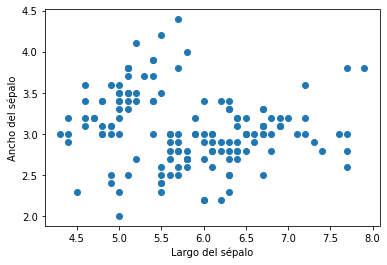

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # sklearn.datasets contiene varios de los datasets clasicos de ML
from sklearn import neighbors

iris = load_iris()

X, y = iris.data, iris.target

# visualizamos como se relacionan el largo y el ancho del sepalo de las distintas flores
plt.scatter(X[:,0], X[:,1]) 
plt.xlabel('Largo del sépalo')  # xlabel le da un nombre al eje de las x
plt.ylabel('Ancho del sépalo')  # ylabel le da un nombre al eje de las y
plt.show()

In [3]:
# tomamos los primeros dos features para mostrarlos mejor graficamente (el largo y el ancho del sepalo)
# (por eso el iris.data[:, :2])
X = iris.data[:, :2]
y = iris.target

Vamos a usar ambos features para entrenar nuestro modelo y graficar los puntos del dataset para el largo y ancho del sépalo, para cada tipo de flor

In [4]:
# en primer lugar, vamos a ver las tres salidas posibles y los nombres de los features que elegimos

print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# tras esto, vamos a seleccionar todos los puntos asociados a cada una de las salidas.
# Para ello vamos a restringir la matriz de entradas X a cada una de las entradas y
# salidas que nos interesan

# y==0 es una máscara que restringe X a aquellas filas asociadas con la salida 0 (setosa, según el 
#nombre de los features), mientras que el 0 detrás de la "," restringe X a la columna 0
# (es decir, largo del sepalo)
X_setosa_largo_sepalo = X[y==0, 0]
print(X_setosa_largo_sepalo)

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]


In [6]:
# hacemos esto mismo para las demas combinaciones
X_setosa_ancho_sepalo = X[y==0, 1]
X_virginica_largo_sepalo = X[y==1, 0]
X_virginica_ancho_sepalo = X[y==1, 1]
X_versicolor_largo_sepalo = X[y==2, 0]
X_versicolor_ancho_sepalo = X[y==2, 1]

Para nuestros fines, el módulo *pyplot* de matplotlib funciona (simplificadamente) de la siguiente manera:

1. En las primeras líneas de código se establecen los puntos, líneas o figuras que se desean graficar, como así también pueden establecerse extensiones para el gráfico (por ejemplo, darle un nombre a los ejes). Normalmente sigue el formato (para trazar curvas)

        plt.plot(x, y)
    
    (las variables $x$ e $y$ aquí mencionadas hacen referencia a posiciones en el eje cartesiano, no confundir con $X$ e $y$ del dataset)
    o bien, simplemente para graficar puntos,
    
        plt.scatter(x, y)
        
    en donde se determina que se realizará un gráfico tomando en cuenta la posición (x, y).

    Por ejemplo, el código

        plt.scatter(1, 2.5)
        
    indica que se introduce un punto en la posición $x=1$, $y=2.5$) de los ejes cartesianos.
    Lo más práctico es pasar vectores de puntos $X$ e $Y$, de tal forma que grafique cada par $(x_i, y_i)$.

2. El gráfico deja de recibir entradas tras leer la línea "plt.show()", en donde se muestra el gráfico de acuerdo a los puntos, líneas o figuras establecidas anteriormente. 

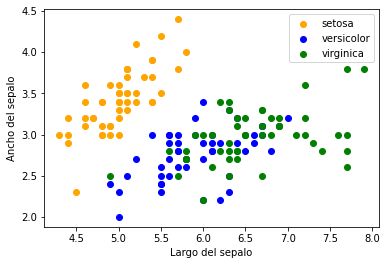

In [7]:
# graficamos de acuerdo a la distribucion de los puntos

plt.scatter(X_setosa_largo_sepalo, X_setosa_ancho_sepalo, label=iris.target_names[0], color='orange')
plt.scatter(X_virginica_largo_sepalo, X_virginica_ancho_sepalo, label=iris.target_names[1], color='blue')
plt.scatter(X_versicolor_largo_sepalo, X_versicolor_ancho_sepalo, label=iris.target_names[2], color='green')

# legend coloca una caja con las leyendas correspondientes a los puntos del grafico
plt.legend(loc='best', numpoints=1) 
plt.xlabel('Largo del sepalo')
plt.ylabel('Ancho del sepalo')

plt.show()

Notar que es también posible graficar utilizando directamente las restricciones sobre la matriz de datos $X$:

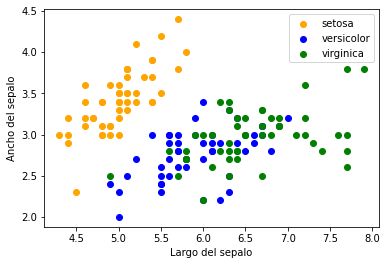

In [8]:
plt.scatter(X[y==0, 0], X[y==0, 1], label=iris.target_names[0], color='orange')
plt.scatter(X[y==1, 0], X[y==1, 1], label=iris.target_names[1], color='blue')
plt.scatter(X[y==2, 0], X[y==2, 1], label=iris.target_names[2], color='green')

plt.legend(loc='best', numpoints=1)
plt.xlabel('Largo del sepalo')
plt.ylabel('Ancho del sepalo')

plt.show()

Ejemplo: clasificador NN hecho a mano

Veamos cómo se ve un clasificador NN "artesanal", es decir un KNN donde K=1 (basado en http://cs231n.github.io/classification/). Para ello tenemos que definir, a priori, qué consideramos como distancia entre dos vectores de observaciones $X_i = (X_{i1} \dots X_{ip})$ y $X_j = (X_{j1} \dots X_{jp})$, debido a que los mismos poseen varias columnas (predictores). Para empezar, vamos a utilizar la **distancia L1**, dada por

$$d_{L1}(X_i, X_j) = \sum_p \big| X_{ip} - X_{jp} \big|$$

In [9]:
class ClasificadorNN(object):  # <object> en [...]_NN(object) indica que hereda de la clase object

    # <self> indica referencia a un objeto concreto de la clase
    def __init__(self):
        # inicializamos ambos atributos X e y arbitrariamente
        self.X = []
        self.y = []

    def fit(self, X_train, y_train):
        # para el caso de KNN, nuestro entrenamiento solo consiste en recordar los datos
        # (X, y) de entrenamiento. Un entrenamiento de un algoritmo de ML involucra
        # normalmente un proceso iterativo, que se detiene cuando alguna condicion de
        # convergencia es alcanzada (o tras una cierta cantidad de iteraciones)
        self.X = X_train
        self.y = y_train

    def predict(self, X_test):
        # inicializamos nuestra variable de salida, y_hat, con un tamanio igual a la
        # cantidad de filas
        y_hat = np.zeros(X_test.shape[0])

        for i in range(X_test.shape[0]):  # vamos a iterar sobre todas las filas de datos
            matriz_distancia = np.abs(self.X - X_test[i, :])
            
            # axis=1 significa que la suma se realiza entre los elementos de cada fila, 
            # ej. los elementos X11, X12, X13, X14 (axis=0 haría que la suma se 
            # realice entre los elementos de cada columna, es decir entre X11, X12, ...). 
            # axis=None haría que la suma se realize entre todos los elementos, devolviendo 
            # un escalar. Para mas info ver sección Examples en
            # https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
            suma_distancias = np.sum(matriz_distancia, axis=1)
            # np.argmin() devuelve el indice del menor elemento dada un ndarray
            indice_punto_mas_cercano = np.argmin(suma_distancias)
            y_hat[i] = self.y[indice_punto_mas_cercano]

        return y_hat

Antes de continuar, vamos a dividir nuestro conjunto de datos en entrenamiento y test

![](images/3/train_test_split.svg)

* Al conjunto de entrenamiento lo utilizaremos para **entrenar el modelo**, haciendo que aprenda patrones o características en los datos para que pueda aprender a **generalizar** a casos no vistos. La diferencia entre las observaciones en el conjunto de entrenamiento y las predicciones de nuestro modelo está expresada por el **error de entrenamiento**, y es una de las medidas que determinan qué tan bien está entrenado nuestro modelo.

* Por otra parte, al conjunto de test lo vamos a utilizar para **evaluar la capacidad de generalización del modelo**, observando cómo el mismo predice salidas a partir de entradas que no utilizó para entrenar. Similarmente, la diferencia entre las observaciones en el conjunto de test y las predicciones de nuestro modelo está expresada por el **error de test**, y es una de las medidas que nos dice qué tan bien está generalizando nuestro modelo.

In [10]:
# Vamos a usar un conjunto de entrenamiento de 70% (105/150) y uno de test de 30% (45/150)

X_train = X[0:105]
X_test = X[105:150]
y_train = y[0:105]
y_test = y[105:150]

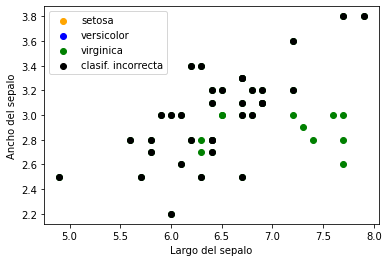

In [11]:
# Instanciamos nuestro clasificador

clf = ClasificadorNN()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)


# Graficamos los resultados

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label=iris.target_names[0], color='orange')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label=iris.target_names[1], color='blue')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], label=iris.target_names[2], color='green')
plt.scatter(X_test[y_test!=y_hat, 0], X_test[y_test!=y_hat, 1],
                   label='clasif. incorrecta', c='black') # Agregamos las malas predicciones

plt.legend(loc='best', numpoints=1)
plt.xlabel('Largo del sepalo')
plt.ylabel('Ancho del sepalo')

plt.show()

In [12]:
# ¿tantos incorrectos?

print('Porcentaje de aciertos: ', len(y_test[y_test==y_hat])/len(y_test))
# estamos obteniendo el porcentaje (o tasa de aciertos) al dividir la cantidad de ocurrencias del
# conjunto y_test en donde los elementos coinciden con y_hat sobre la cantidad de ocurrencias de y_test

Porcentaje de aciertos:  0.24444444444444444


¿Por qué clasifica tan mal?

* Porque estamos tomando los datos de entrenamiento y test con **índices arbitrarios**, por ejemplo

        y_train = y[0:105]

In [13]:
# veamos mas detalladamente...

print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2]


In [14]:
print(y_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


* Casi no tiene ejemplos de entrenamiento para la clase "virginica", mientras que el conjunto de test abarca toda esa clase...
* Este es un **error grave** al preparar los datos para su entrenamiento en un modelo, **porque los datos están previamente ordenados de acuerdo a algún criterio preestablecido**.

¿Solución?

* Mezclar los datos para que su orden sea aleatorio.
* Afortunadamente scikit\_learn nos provee con un método justo para hacer eso...

In [15]:
from sklearn.model_selection import train_test_split

# Dividimos el conjunto en train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)

# vemos los resultados de la mezcla...
print(y_test)

[0 0 0 1 0 1 1 0 0 0 2 1 1 0 2 1 0 1 0 0 0 2 2 1 1 0 2 1 1 2 0 1 0 1 2 1 0
 1 1 0 0 0 1 1 1]


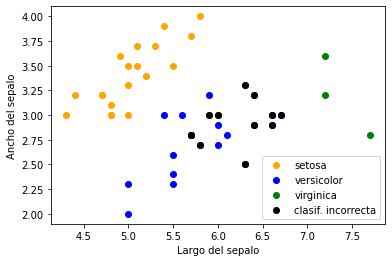

In [16]:
#Probamos entrenar...
 
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Graficamos los resultados

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label=iris.target_names[0], color='orange')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label=iris.target_names[1], color='blue')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], label=iris.target_names[2], color='green')
plt.scatter(X_test[y_test!=y_hat, 0], X_test[y_test!=y_hat, 1],
                   label='clasif. incorrecta', c='black') # Agregamos las malas predicciones

plt.legend(loc='best', numpoints=1)
plt.xlabel('Largo del sepalo')
plt.ylabel('Ancho del sepalo')

plt.show()

In [17]:
# veamos el resultado...

print('Porcentaje de aciertos: ', len(y_test[y_test==y_hat])/len(y_test))

Porcentaje de aciertos:  0.7333333333333333


Veamos cómo podemos implementar un clasificador kNN, utilizando la librería a alto nivel de scikit-learn.

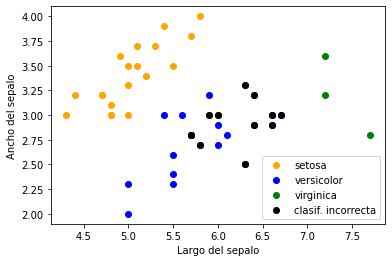

In [18]:
# Instanciamos nuestro clasificador
clf_sk = neighbors.KNeighborsClassifier(n_neighbors=1, p=1)

clf_sk.fit(X_train,y_train)
y_hat = clf_sk.predict(X_test)

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label=iris.target_names[0], color='orange')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label=iris.target_names[1], color='blue')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], label=iris.target_names[2], color='green')
plt.scatter(X_test[y_test!=y_hat, 0], X_test[y_test!=y_hat, 1],
                   label='clasif. incorrecta', c='black') # Agregamos las malas predicciones

plt.legend(loc='best', numpoints=1)
plt.xlabel('Largo del sepalo')
plt.ylabel('Ancho del sepalo')

plt.show()

In [19]:
print('Tasa de aciertos: ', len(y_test[y_test==y_hat])/len(y_test))

Tasa de aciertos:  0.7333333333333333


También podemos obtener esta misma tasa a partir de los métodos de scikit-learn, lo cual nos ahorra el tener que hacerlo a mano.

In [20]:
from sklearn.metrics import accuracy_score

print('Tasa de aciertos: ', accuracy_score(y_true=y_test, y_pred=y_hat))

Tasa de aciertos:  0.7333333333333333


## Validación cruzada con k-folds

Nuestra mejora en la tasa de aciertos se debió a que reordenamos el conjunto de datos aleatoriamente. Ahora bien, ¿qué sucedería si tenemos realmente muy mala suerte en el ordenamiento de los datos y volviéramos a tener un conjunto parecido al primero? ¿Y si en cambio tenemos muy buena suerte y el porcentaje de aciertos alcanzado es mucho mayor porque las predicciones mas difíciles estaban en el conjunto de entrenamiento?

* **Validación cruzada**: los datos son repetidamente separados en pares no superpuestos de entrenamiento y test, donde se ajusta un modelo separado para cada uno de dichos pares y se promedian los resultados.

* El método más común de validación cruzada es *k-folds*, donde los datos son separados en *k* pliegues (folds, normalmente son 5 o 10), donde para cada iteración se usa uno de los pliegues como conjunto de test y el resto como conjunto de entrenamiento, siendo la salida el promedio de los errores de todas las iteraciones.

* Este método asegura que todos los datos sean incluidos en el conjunto de test al menos una vez.

* Desventaja: aumenta muy considerablemente el costo computacional, haciendo que este método sea muy caro para datasets grandes.

![Validación cruzada con k-folds](images/3/k-fold_cross_validation.png)

* **Atención con el *data leakage***: al realizar la división, los datos de entrenamiento no deben contener datos que "filtren" información de las salidas del conjunto de test. Esto suele depender del dominio del problema, por ejemplo ver la [controversia sobre un artículo en la Nature sobre el uso de Deep Learning para predicción de terremotos](https://www.theregister.co.uk/2019/07/03/nature_study_earthquakes/) y sus correspondientes [posts](https://www.reddit.com/r/MachineLearning/comments/c4ylga/d_misuse_of_deep_learning_in_nature_journals/) de [debate](https://www.reddit.com/r/MachineLearning/comments/c5is9e/r_one_neuron_is_more_informative_than_a_deep/) en [reddit](https://old.reddit.com/r/MachineLearning/comments/c8zf14/d_was_this_quake_ai_a_little_too_artificial/).

## Ajuste de Híper-parámetros

Ahora que sabemos cómo evaluar un modelo, vamos a ver el que es uno de los temas más complejos en ML: el ajuste de los híper-parámetros.

* Quitando el caso de kNN, casi todo modelo internamente relaciona las entradas con las salidas por medio de **parámetros**, denotados comúnmente por $\theta = (\theta_1, \theta_2, \dots)$..

* Es en los parámetros que el modelo "guarda su aprendizaje" tras el entrenamiento, el cual suele consistir en ajustar iterativamente tales parámetros hasta que los mismos se estabilicen o permitan alcanzar alguna métrica.

* Por ejemplo, en una regresión lineal donde $\hat{y} = ax + b$, los parámetros son $a$ y $b$.

* Ahora bien, existen características que definen al modelo pero no son modificadas en el entrenamiento sino que se ubican en un nivel más alto de abstracción que los parámetros. Tales se conocen como **híper-parámetros**, denotados aquí por $\phi = (\phi_1, \phi_2, \dots)$.

* Los híper-parámetros son cruciales en el aprendizaje de un modelo, porque afectan cómo el mismo se desempeña y entrena. En el ejemplo de la regresión, un híper-parámetro $\phi_{grado}$ podría establecer el grado del polinomio, determinando a su vez la cantidad de parámetros utilizados en el aprendizaje. Ejemplo, con $\phi_{grado}=2$, la regresión estaría dada por $\hat{y} = ax^2 + bx + c$

* Pueden ir desde un nivel bajo de abstracción, por ejemplo $\phi$ puede representar la cantidad $k$ de vecinos en un algoritmo kNN, escalar más en la abstracción y representar la fórmula de distancia entre dos vectores, o bien escalar mucho más y representar qué modelo se utiliza.

* Es en el ajuste de híper-parámetros uno de los puntos principales donde ML **es más un arte que una ciencia**.

* Muchas veces los $\phi$ son establecidos por "decisiones de diseño" (ejemplo: "vamos a utilizar el siguiente modelo por su capacidad de explicar sus predicciones"); otras veces son establecidos a mano por prueba y error, y otras veces son ajustados a partir de algún método.

* Vamos a ver una forma de ajustarlos: separar un subconjunto del conjunto de entrenamiento para validación del modelo y utilizar Grid Search.

### Búsqueda en grilla (grid search)

* Método de optimización exhaustiva
* Dividimos el espacio de híper-parámetros en una grilla, y tomamos una muestra por cada casillero

![búsqueda en grilla](images/3/grid_search.png)

### K-folds

![](images/3/cross-validation_and_hyperparams.jpeg)

Fuente: curso Convolutional Neural Networks for Visual Recognition (2016)

* Vamos a usar el fold amarillo, denominado **subconjunto de validación** para ajustar los híper-parámetros.
* Una vez determinados los mejores híper-parámetros, el conjunto de test debe entonces utilizarse una única vez para ver el resultado final de nuestro predictor.


Bonus: Algunas librerías de optimización automática de híper-parámetros para Machine Learning:

* [Grid Search de Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* [Optuna](https://github.com/pfnet/optuna)
* [BayesianOptimization](https://github.com/fmfn/BayesianOptimization)
* [Optunity](https://optunity.readthedocs.io)
* [AdaNet (para Tensorflow)](https://github.com/tensorflow/adanet)
* [BoTorch (para PyTorch)](https://github.com/pytorch/botorch)

### Trabajo Práctico 1

Utilizando de tu elección para clasificación (o regresión), realizar la mejora iterativa de un modelo de predicción para dicho dataset. Realizar un informe (estilo bitácora, puede ser un notebook, un pdf/doc o incluso estar junto con el código) en donde se especifiquen las distintas etapas de iteración del mismo, comentando lo que se intentó, lo que funcionó, lo que no, citando las fuentes consultadas.

Las consignas son las siguientes:

1. Seleccionar un dataset de interés. Puede ser público (ver algunos links de ejemplo debajo) o propio. Cargarlo en un notebook, pre-procesarlo si es necesario y obtener visualizaciones/sumarizaciones del mismo que ayuden a entenderlo. Dadas las técnicas que vimos hasta ahora, se sugiere que el dataset sea estructurado. 

    **Sugerencia**: empezar con un dataset simple (se adjunta código para comenzar con el dataset *breast cancer*), priorizando entender las librerías y métodos utilizados por sobre la complejidad de los datos. Una vez hecho eso, pasar a conjuntos de datos más complejos, si así se lo desea. Si se empieza por un dataset simple y se pasa a uno complejo, se sugiere incluir ambos análisis en el informe.

1. Entrenar en el mismo modelos de clasificación (o regresión, si aplica), probando modelos más flexibles como [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) o [support vector machines](https://scikit-learn.org/stable/modules/svm.html) (para repaso: [link a notebook con resumen rápido de algunos modelos](https://github.com/inteligenciafrvm/inteligenciafrvm/blob/master/Archivo%20y%20extras/Material%20Extra/Clasificaci%C3%B3n%20-%20Vista%20general%20de%20algunos%20modelos/Clasificaci%C3%B3n%20-%20Vista%20general%20de%20algunos%20modelos.ipynb)). Si se usa Kaggle y es una competencia abierta: Se alienta a realizar envíos a Kaggle y especificar cuáles fueron los puntajes en la tabla de posiciones tras la(s) submission(s). Si no se usa Kaggle, especificar la métrica alcanzada en las distintas iteraciones del modelo.

1. Realizar algún tipo de normalización en los datos. Decidir si la misma es incluída (o no) en el modelo, y justificar brevemente por qué (se lo puede ir viendo en la primera parte del [notebook de Clasificación II](https://github.com/inteligenciafrvm/inteligenciafrvm/blob/master/Clases%20pr%C3%A1cticas/4.%20Intro%20al%20aprendizaje%20supervisado%20(clasificaci%C3%B3n%20II).ipynb)).

1. Buscar buenos híper-parámetros haciendo [búsqueda en grilla](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search) o algún otro método, utilizando un subconjunto de validación. Puede hacerse manualmente, utilizando *k-folds* (ver plantilla debajo), [mediante la librería de Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), o alguna otra forma.

1. Si se realiza clasificación, mostrar métricas de tasa de aciertos, precision, recall y matriz de confusión. Si se usara regresión mostrar métricas como el error cuadrático medio.

Fecha de entrega: **28/05/2021 23:59**

La resolución de los ejercicios de este TP es **individual**. Está permitida la reutilización del código del notebook (por ejemplo para confeccionar gráficos).

Existen muchos kernels online que establecen cómo resolver los datasets de los concursos. Si bien se alienta a ver otras formas de resolver problemas, esto no debe ir en contra del requisito de originalidad.

Conjuntos de datos de ejemplo de baja complejidad, para comenzar rápidamente 

* Cáncer de mama (breast cancer, se incluye plantilla inicial debajo). [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset)

* Predicción de precios de las casas. [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-house-prices-dataset) [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

* Predicción de calidad de vino. [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset) [Kaggle](https://www.kaggle.com/aleixdorca/wine-quality). Opción 2: predecir si el vino es rojo o blanco.

* Diabetes. [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

* Predicción de dígitos. [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html#optical-recognition-of-handwritten-digits-dataset)

* Predicción del animal. [UCI](https://archive.ics.uci.edu/ml/datasets/Zoo)

* Predicción de enfermedades del corazón. [Kaggle](https://www.kaggle.com/johnsmith88/heart-disease-dataset)

* Predicción del género según la voz. [Kaggle](https://www.kaggle.com/primaryobjects/voicegender)

Otras fuentes de datasets:

* [Competencias Kaggle](https://www.kaggle.com/competitions), [Datasets Kaggle](https://www.kaggle.com/datasets) y [sobre COVID-19](https://www.kaggle.com/covid19)

* [Datos Argentina](http://datar.info/dataset)

* [Awesome public datasets (Github)](https://github.com/awesomedata/awesome-public-datasets)

* [Portal de datos Argentina](https://datos.gob.ar/) [Github](https://github.com/datosgobar)

* [Repositorio UCI](http://archive.ics.uci.edu/ml/datasets.php)

In [21]:
# Plantilla inicial para comenzar con ejemplo de breast cancer

# este método simplifica la carga del conjunto de datos de forma 
# está disponible al ser un conjunto de datos muy utilizado
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

# Completar con tu código desde aquí

# Empezar por:
# 1 visualizar datos, ver sumarizaciones
# 2 dividir entre entrenamiento y test
# 3 entrenar un modelo simple, ej: kNN
# 4 ver métricas de rendimiento

# Luego, seguir con:
# 4 normalizar características ¿mejora haciendo eso?
# 5 optimizar hiperparametros ¿cuánto mejora?
# 6 aplicar modelos más complejos ¿mejora con modelos más complejos?
# 7 modificar optimización de híper-parámetros y usar kfolds

Plantillas adicionales

In [22]:
# Plantilla inicial de ejemplo para KFolds

from sklearn.model_selection import KFold

# n_splits es el numero de divisiones
kf = KFold(n_splits=5, shuffle=True,random_state=40)

# El siguiente for nos abstrae de tener que manejar explicitamente los subindices de los folds, 
# al dividir el conjunto de entrenamiento iterativamente. En cada una de sus iteraciones
# obtenemos los subindices de todos los folds de entrenamiento y del fold de validacion de una
# division en particular, de modo tal que todos los k folds sean al menos una vez usados para 
# entrenar el modelo
for train_index, validation_index in kf.split(X_train):
    X_train_kf, X_validation_kf = X_train[train_index], X_train[validation_index]
    y_train_kf, y_validation_kf = y_train[train_index], y_train[validation_index]
    
    # desde aqui estamos trabajando con una division train-validation en particular
    # es decir, por ejemplo, que train_index nos da todos los indices que componen a
    # los folds que se usaran para entrenar el modelo en esta division. Usamos estos
    # indices para obtener los X_train_kf y los y_train_kf. Lo mismo sucede con los
    # indices usados para el fold de validación en esta division. Si se desea ver
    # como cambian los indices en cada iteracion, hacer un print(validation_index)

Ejemplo: trabajando con dataset Titanic

In [23]:
# codigo de ejemplo para leer y hacer transformaciones basicas en un dataset 
# (mas info en https://www.kaggle.com/c/titanic/data)

# pandas es una gran libreria para manejo de sets de datos grandes
import pandas as pd  

# importamos los datos del csv como dataframe
df = pd.read_csv('data/train_titanic.csv')  # dataframe descargado de https://www.kaggle.com/c/titanic/data
# (si quisieramos guardar a un csv (por ejemplo para hacer la submission), el procedimiento es similar,
# es decir df.to_csv('<path>'))

# vemos las primeras 5 columnas
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [24]:
# vemos las columnas del dataset
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [25]:
# vemos una descripción general del dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# vemos la correlación lineal de las variables del dataset
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


[]

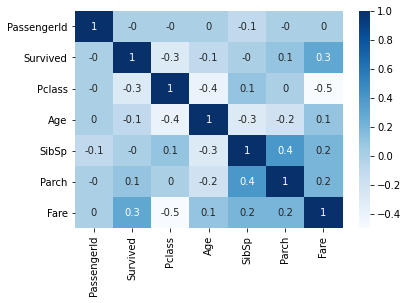

In [27]:
# graficamos esa correlación para visualizarla mejor

import seaborn as sns
sns.heatmap(round(df.corr(),1), cmap='Blues', annot=True)
plt.plot()

Este análisis es muy interesante para entender cómo cambian pares de features en tándem. Recordar que **correlación no implica causalidad** ([Ejemplo 1](http://tylervigen.com/spurious-correlations), [2](https://en.wikipedia.org/wiki/Clever_Hans), [3](https://en.wikipedia.org/wiki/Survivorship_bias)). Si bien es un buen indicio para explorar una hipótesis, la misma debería ser validada o refutada por otros medios.

In [28]:
# transformamos el dataframe en matriz de datos

#  'loc' en un dataframe permite obtener datos de forma similar a las listas en
# python y numpy, con la diferencia de que las posiciones de las mismas son llamadas
# por medio de los nombres de las columnas, y la posición final *sí* es incluida
X = df.loc[:, df.columns != 'Survived'].values
y = df['Survived'].values

In [29]:
# vemos la matriz de datos X
print(X)

[[1 3 'Braund, Mr. Owen Harris' ... 7.25 nan 'S']
 [2 1 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' ... 71.2833
  'C85' 'C']
 [3 3 'Heikkinen, Miss. Laina' ... 7.925 nan 'S']
 ...
 [889 3 'Johnston, Miss. Catherine Helen "Carrie"' ... 23.45 nan 'S']
 [890 1 'Behr, Mr. Karl Howell' ... 30.0 'C148' 'C']
 [891 3 'Dooley, Mr. Patrick' ... 7.75 nan 'Q']]


In [30]:
# vemos el vector *y* de las primeras 20 salidas
print(y[:20])

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1]


Bonus: [excelente pipeline de trabajo con el dataset Titanic](https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic)